## TD Lambda X Steps

In [8]:
import pickle

In [9]:
import sys

module_path = 'src' 
if module_path not in sys.path:
    sys.path.append(module_path)

In [10]:
from parameters import *

In [11]:
from model_plot_utils import plot_trajectory

In [12]:
from TDLambdaXSteps_model import TDLambdaXStepsRewardReceived

In [13]:
model = TDLambdaXStepsRewardReceived()

In [14]:
with open('/Volumes/ssrde-home/run2/TDlambdaXsteps_best_sub_fits.p', 'rb') as f:
    sub_fits = pickle.load(f)

In [15]:
MAX_LENGTH = 50

[ 7.41797114e-01  4.68239923e+00  8.85203281e-01  4.16630101e-01
 -8.41235215e+02]
alpha, beta, gamma, lamda, mouseID, nick 0.7417971136694123 4.682399233854914 0.8852032811442605 0.4166301008224827 0 B1


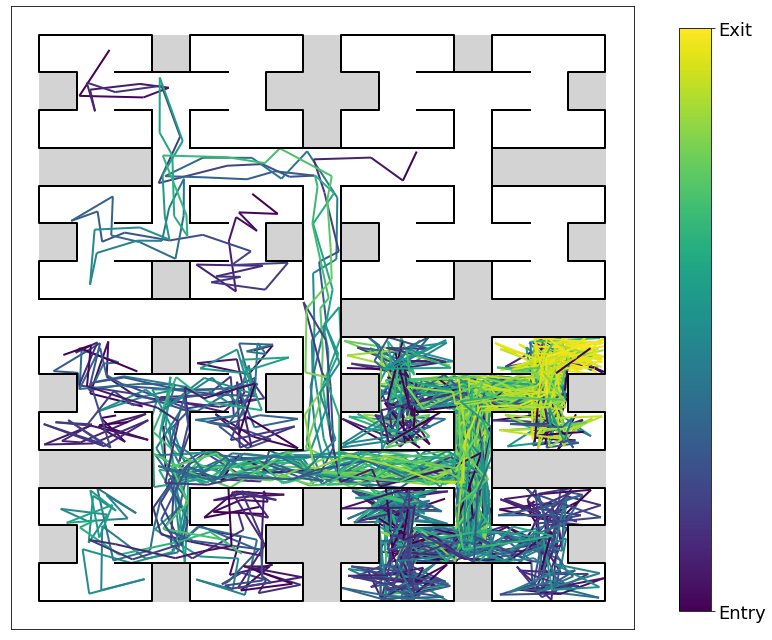

[ 6.79915736e-01  5.44476694e+00  8.93921133e-01  3.39466866e-01
 -1.14114154e+03]
alpha, beta, gamma, lamda, mouseID, nick 0.6799157356522662 5.444766942457976 0.8939211325646239 0.33946686571867735 1 B2


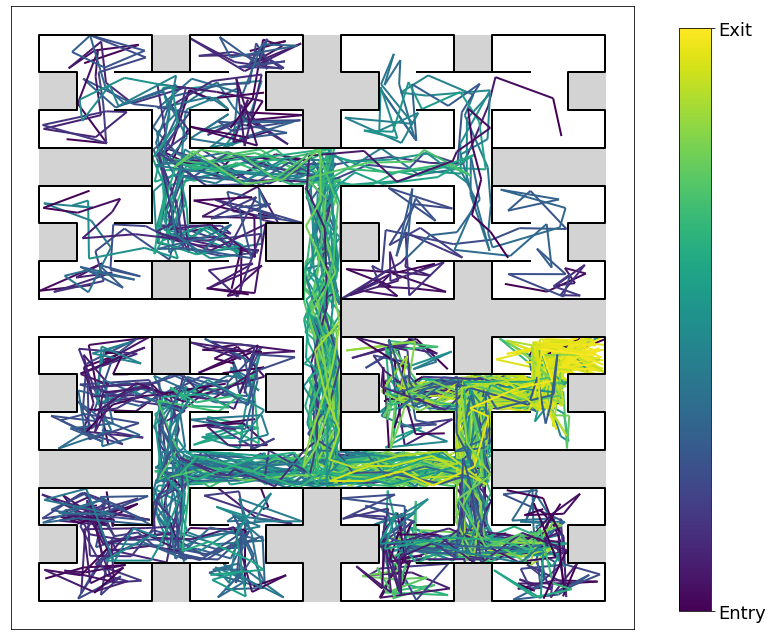

[ 7.07299301e-01  3.64778494e+00  8.87133357e-01  2.33132905e-01
 -6.42405074e+02]
alpha, beta, gamma, lamda, mouseID, nick 0.7072993008077415 3.647784940086592 0.8871333568887905 0.23313290523826527 2 B3


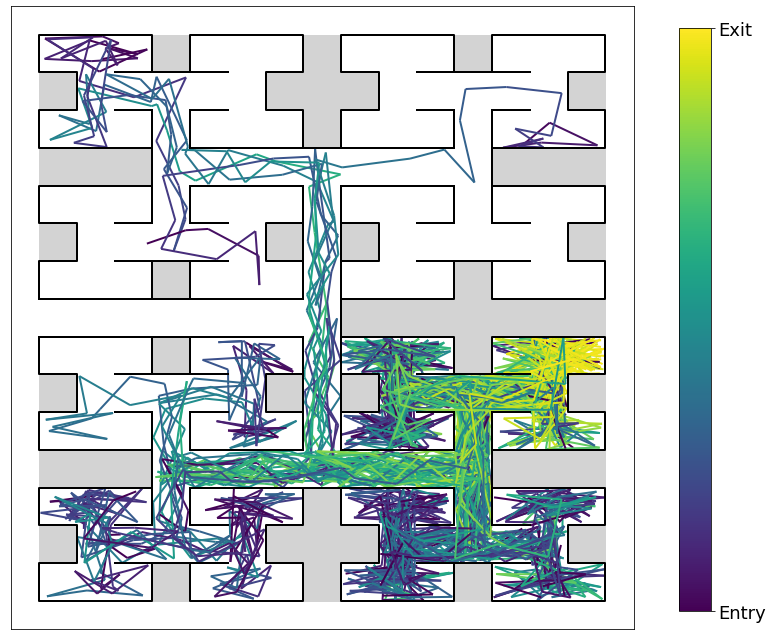

[ 5.97933744e-01  6.11358197e+00  8.89226502e-01  5.08661344e-01
 -1.12905287e+03]
alpha, beta, gamma, lamda, mouseID, nick 0.597933744444819 6.113581972982019 0.8892265019089277 0.5086613439133706 3 B4


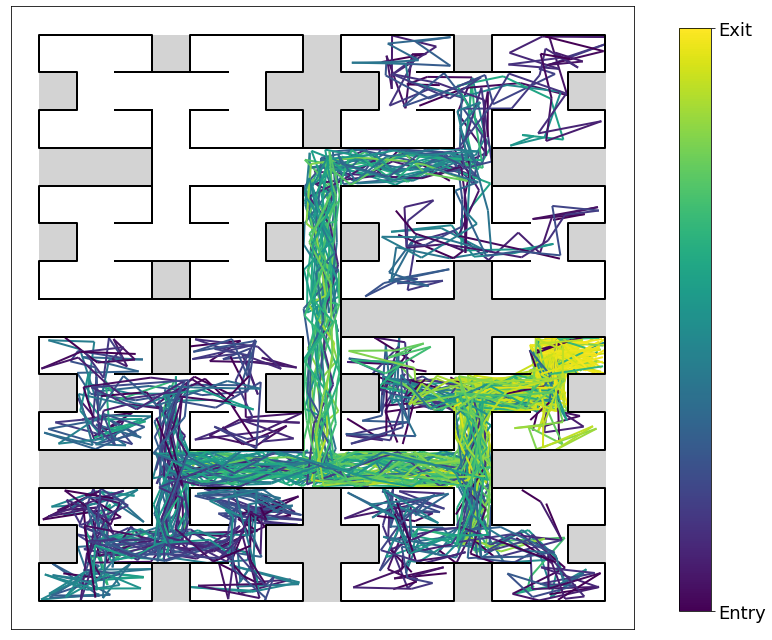

[ 6.57631471e-01  5.38552088e+00  8.60806802e-01  4.60451097e-01
 -1.15368927e+03]
alpha, beta, gamma, lamda, mouseID, nick 0.6576314708157811 5.385520875253615 0.8608068016467406 0.46045109666475276 4 C1


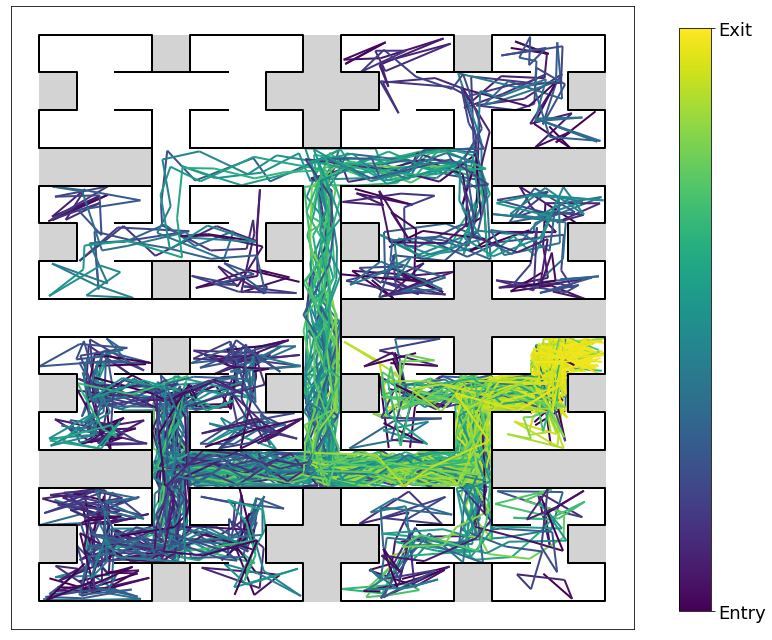

[ 7.21492738e-01  6.26106326e+00  8.57048616e-01  2.74513268e-01
 -1.18133392e+03]
alpha, beta, gamma, lamda, mouseID, nick 0.7214927376538578 6.261063264385169 0.8570486159075842 0.27451326769397133 5 C3


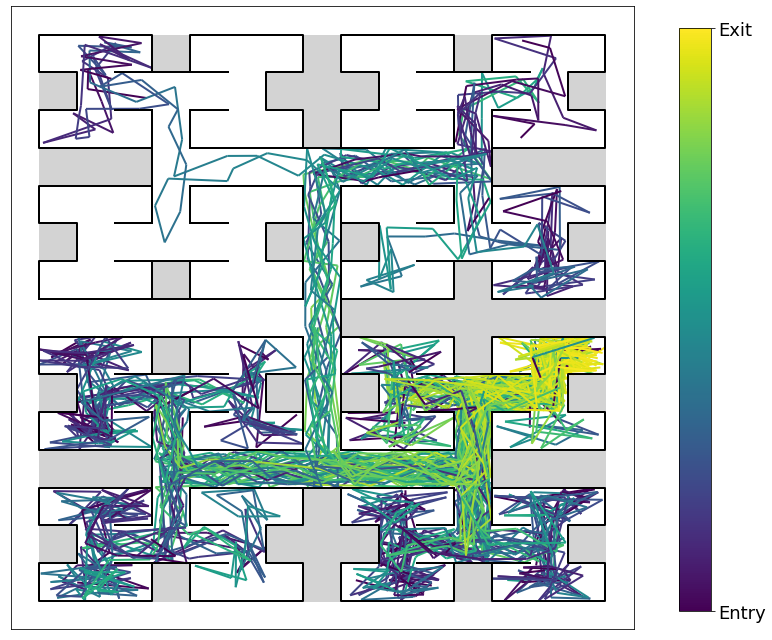

[ 7.71553720e-01  5.18278621e+00  8.70081788e-01  4.60693561e-01
 -1.22885921e+03]
alpha, beta, gamma, lamda, mouseID, nick 0.7715537198861019 5.182786205622955 0.8700817883728442 0.460693560530737 6 C6


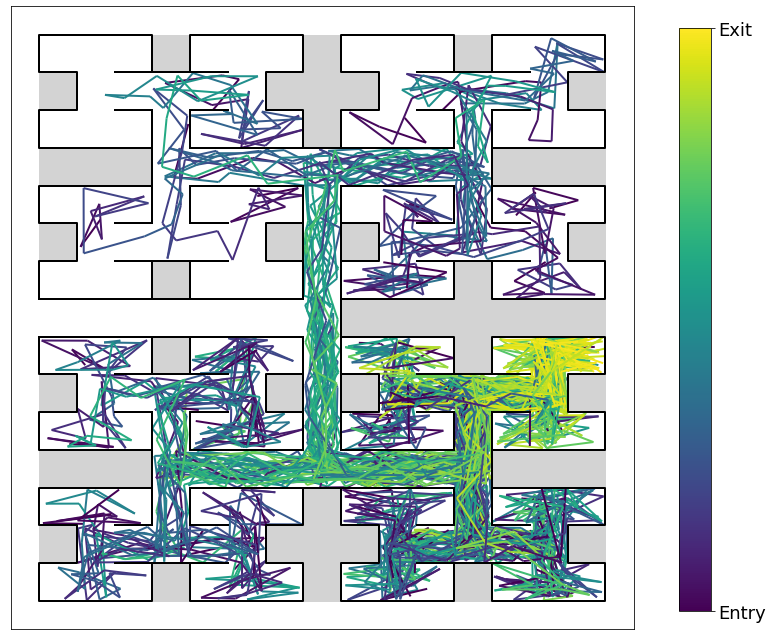

[ 5.13567265e-01  4.20526293e+00  9.43949161e-01  2.91079222e-01
 -1.58889027e+03]
alpha, beta, gamma, lamda, mouseID, nick 0.5135672645263466 4.205262931044651 0.9439491609247763 0.2910792217353487 7 C7


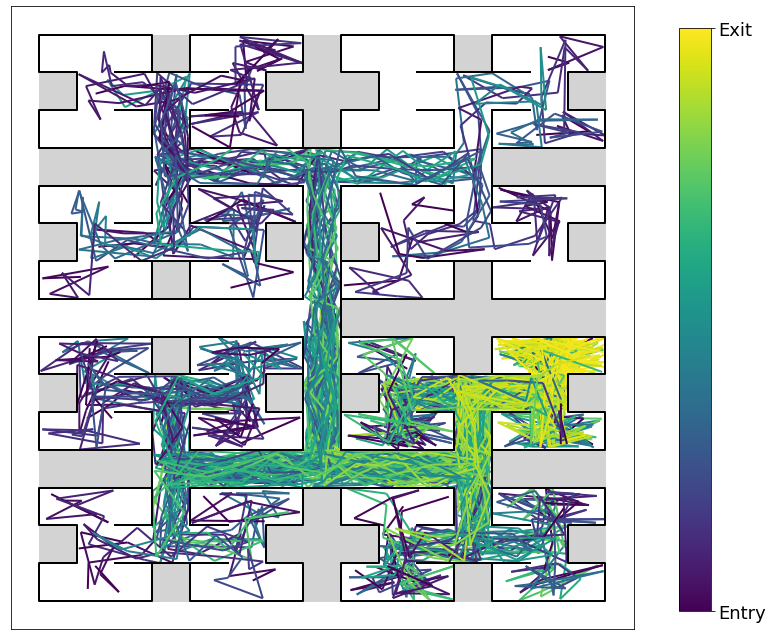

[ 6.09429325e-01  4.88624875e+00  9.47769654e-01  5.57918506e-01
 -1.32132523e+03]
alpha, beta, gamma, lamda, mouseID, nick 0.6094293246498809 4.88624874936775 0.9477696541491267 0.5579185057561038 8 C8


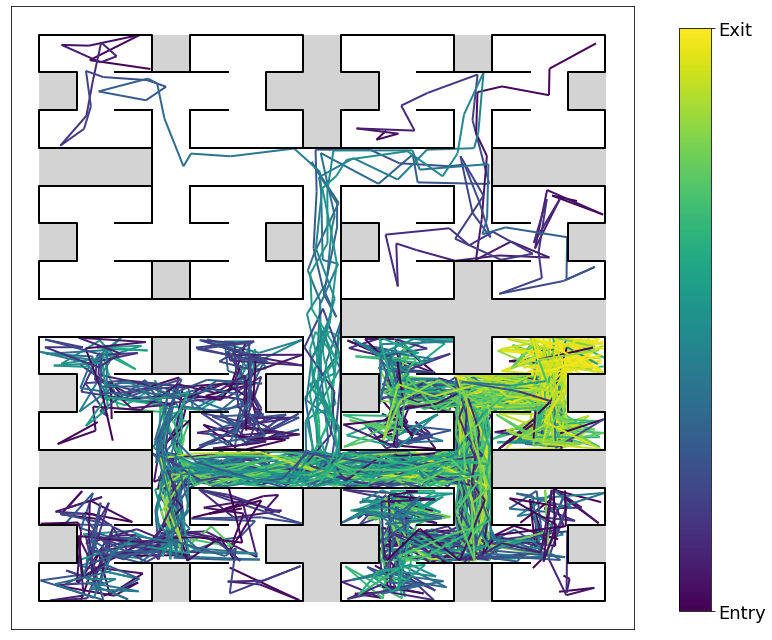

[ 6.28520544e-01  3.67713574e+00  9.21410700e-01  2.43446143e-01
 -1.82600251e+03]
alpha, beta, gamma, lamda, mouseID, nick 0.6285205442990448 3.6771357425380264 0.9214107002369452 0.24344614343368082 9 C9


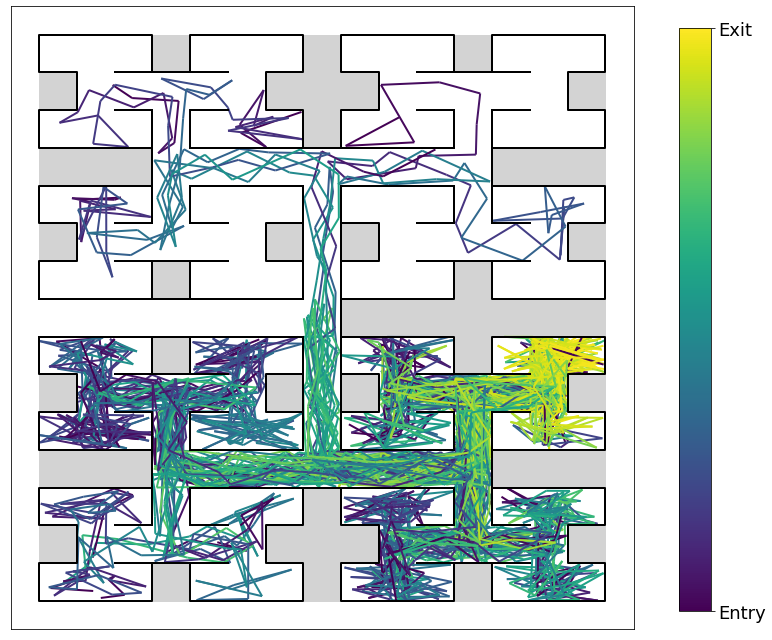

In [16]:
for mouse in range(10):
    print(sub_fits[mouse])
    episodes_all_mice, success, stats = model.simulate({mouse: sub_fits[mouse]}, MAX_LENGTH)
    if success:
        plot_trajectory(episodes_all_mice[mouse], 'all')

In [ ]:
# IGNORE!!!

# Plotting results from running TD(0) model above

# Plotting state values
fig, ax = plt.subplots(figsize=(30,800))
axhandle = ax.imshow(np.transpose(np.reshape(avg_V,(S+1,1))),cmap='YlGnBu')
ax.invert_yaxis()
ax.set_ylabel('V (s)')
ax.set_xticks(np.arange(0,127,5))
ax.set_xticklabels([str(val) for val in np.arange(0,127,5)])
ax.set_xlabel('Nodes')
ax.set_title('Average state values for TD(0) with alpha: %.2f, beta: %.2f and gamma: %.2f' % (alpha,beta,gamma))
fig.colorbar(axhandle,fraction=0.005)

print('Max state value ', np.max(avg_V))
print('Min state value', np.min(avg_V))

# Set trajectories for plotting
print('Total reward: ', total_reward)
print('alpha: ', alpha, ' beta: ', beta, ' gamma: ', gamma)
plot_trajectory(state_hist_all, 'all')

In [ ]:
# IGNORE!!!

# Save plots generated from model fit results for each mouse

save_dir = 'C:/Users/kdilh/Documents/GitHub/MouseMaze/figures/TD0_firstreward/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for mouseID, nickname in enumerate(RewNames):
    state_hist_cell, state_hist_xy = nodes2cell(state_hist_AllMice[mouseID])
    figtitle = 'Simulated trajectory for '+nickname+' with '+str(valid_bouts[mouseID]) \
    +' valid bouts \n '+\
    ' alpha: '+str(np.round(best_sub_fits[mouseID][0],2))+\
    ' beta: '+str(np.round(best_sub_fits[mouseID][1],2))+\
    ' gamma: '+str(np.round(best_sub_fits[mouseID][2],2)) + ', subject LL - random LL: ' + str(np.round(best_sub_fits[mouseID][3] - rand_LL[mouseID],2))
    plot_trajectory('all', save_dir, nickname, figtitle)  # enter a single episode ID or enter 'all'
